### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV


#cross validation 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve 

#scorring 
from sklearn.metrics import mean_squared_error


#Common Model Algorithms
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest,chi2

## Exploratory Data Analysis

In [2]:
data=pd.read_csv('train.csv')
df=data.copy()

#shape of train data => (1460, 81) 
print(f'The shape of train data : {df.shape}')
print(f'All types of data \n {df.dtypes.value_counts()}')
df

The shape of train data : (1460, 81)
All types of data 
 object     43
int64      35
float64     3
dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Missing Values Analysis 

**% of NaN for each feature**
PoolQC           99.5
MiscFeature      96.3
Alley            93.8
Fence            80.8
FireplaceQu      47.3
LotFrontage      17.7
GarageCond        5.5
GarageType        5.5
GarageYrBlt       5.5
GarageFinish      5.5
GarageQual        5.5
BsmtExposure      2.6
BsmtFinType2      2.6
BsmtFinType1      2.5
BsmtCond          2.5
BsmtQual          2.5
MasVnrArea        0.5
MasVnrType        0.5
Electrical        0.1
Utilities         0.0
YearRemodAdd      0.0
MSSubClass        0.0
Foundation        0.0
ExterCond         0.0
ExterQual         0.0
Exterior2nd       0.0
Exterior1st       0.0
RoofMatl          0.0
RoofStyle         0.0
YearBuilt         0.0
LotConfig         0.0
OverallCond       0.0
OverallQual       0.0
HouseStyle        0.0
BldgType          0.0
Condition2        0.0
BsmtFinSF1        0.0
MSZoning          0.0
LotArea           0.0
Street            0.0
Condition1        0.0
Neighborhood      0.0
LotShape          0.0
LandContour       0.0
La

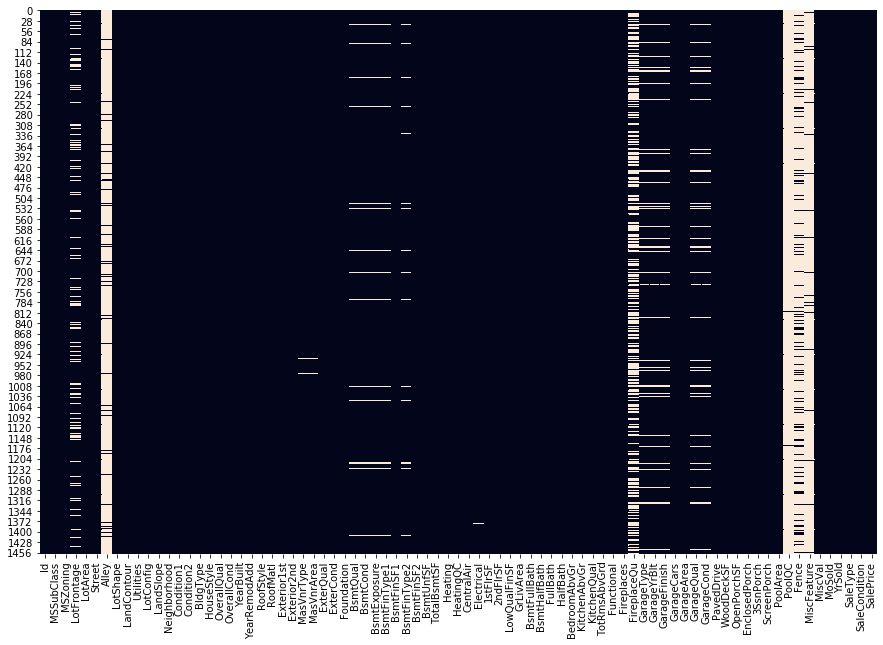

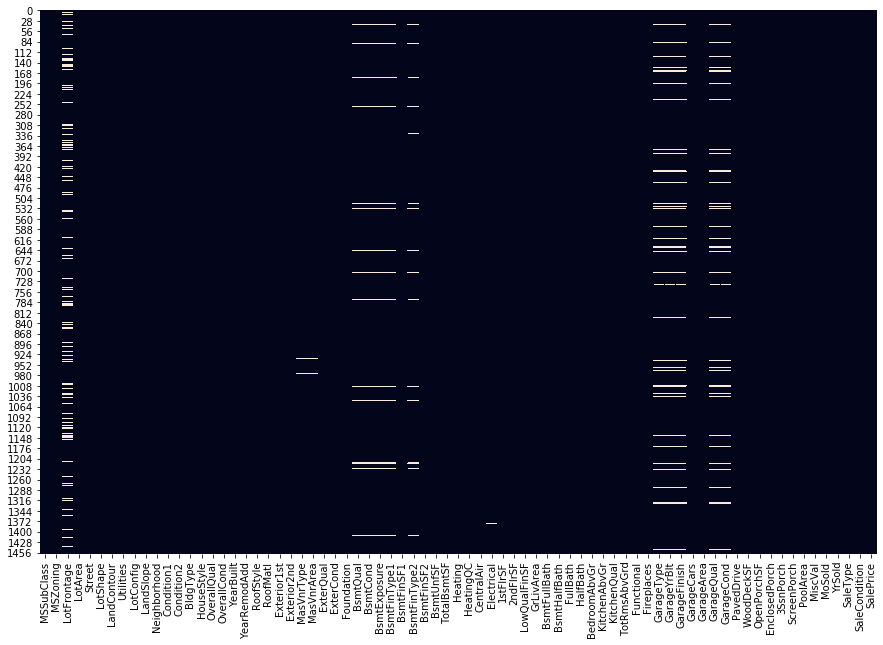

In [3]:
#% NAN for each feature

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
serie=(df.isnull().sum(axis=0)/df.shape[0]*100).round(1).sort_values(ascending=False)
print('**% of NaN for each feature**\n{} \n'.format(serie))
print('Heatmap to visualize missing data')
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False) 

#remove features having lot of missing data (more than 40% ) => are removed : PoolQC, MiscFeature, Alley, Fence,FireplaceQu
df=df[df.columns[df.isna().sum()/df.shape[0]<0.4]]

#remove the feature ID
df=df.drop('Id',axis=1)
print(f'The shape of train data : {df.shape}')
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),cbar=False) 


### Categorical variables analysis

MSZoning......................:5
Street........................:2
LotShape......................:4
LandContour...................:4
Utilities.....................:2
LotConfig.....................:5
LandSlope.....................:3
Neighborhood..................:25
Condition1....................:9
Condition2....................:8
BldgType......................:5
HouseStyle....................:8
RoofStyle.....................:6
RoofMatl......................:8
Exterior1st...................:15
Exterior2nd...................:16
MasVnrType....................:5
ExterQual.....................:4
ExterCond.....................:5
Foundation....................:6
BsmtQual......................:5
BsmtCond......................:5
BsmtExposure..................:5
BsmtFinType1..................:7
BsmtFinType2..................:7
Heating.......................:6
HeatingQC.....................:5
CentralAir....................:2
Electrical....................:6
KitchenQual...................:4
Functio

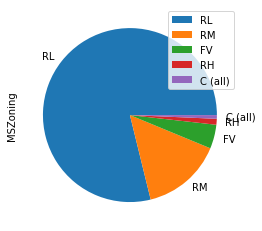

In [4]:
# each categorical variable has at least two categories
for col in df.select_dtypes('object').columns:
    print(f'{col:.<30}:{df[col].unique().shape[0]}')
plt.figure()
df['MSZoning'].value_counts().plot.pie()
plt.legend()

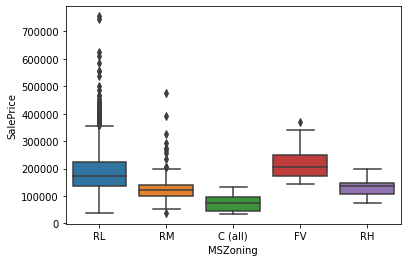

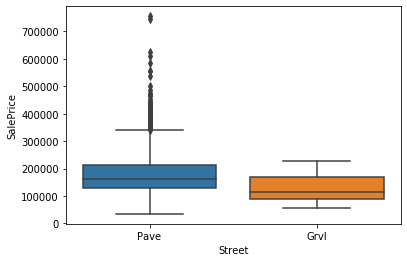

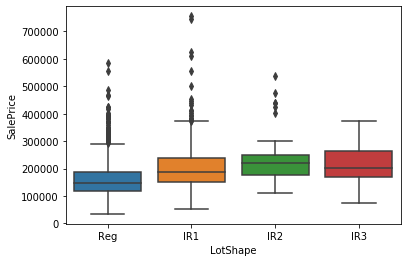

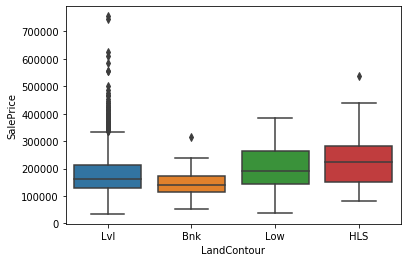

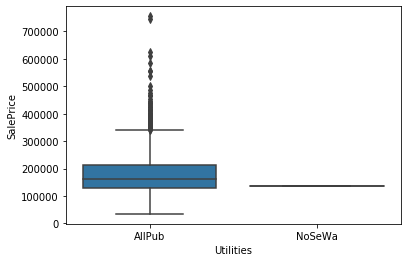

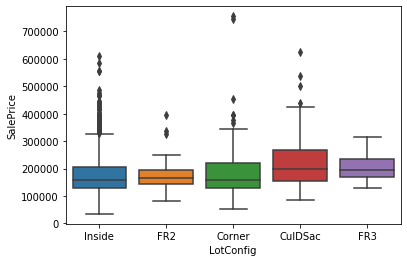

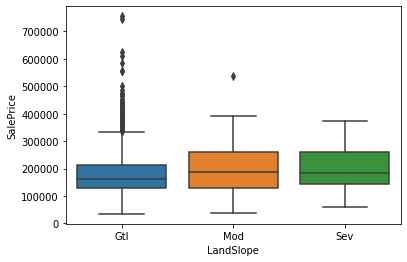

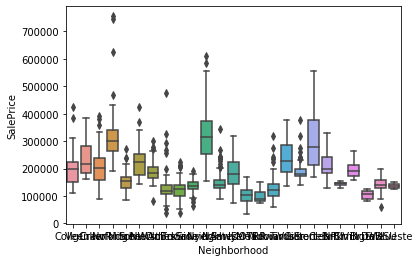

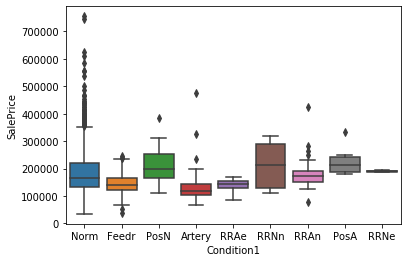

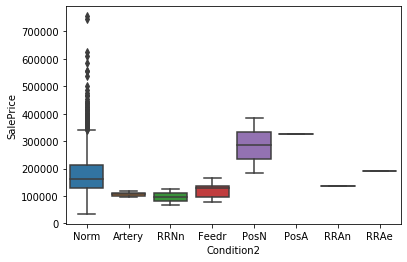

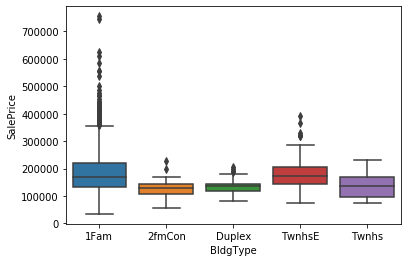

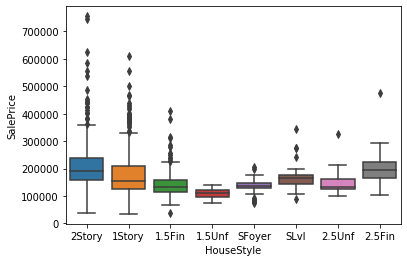

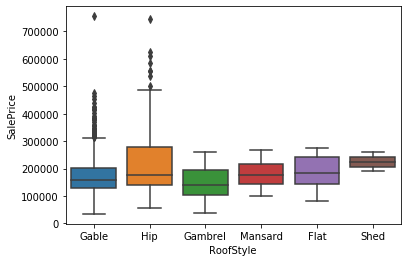

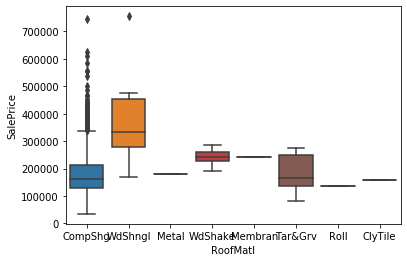

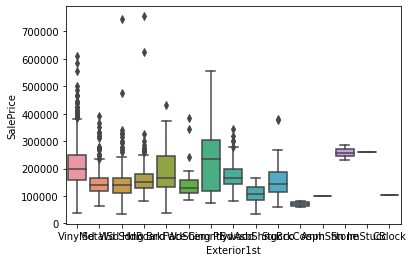

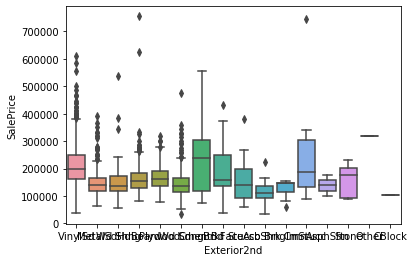

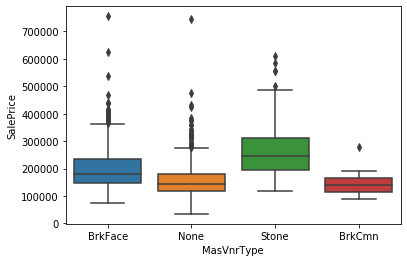

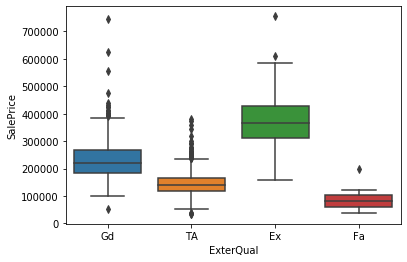

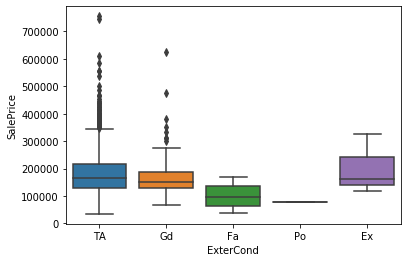

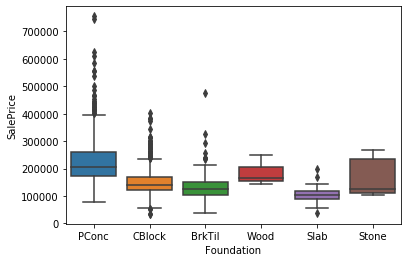

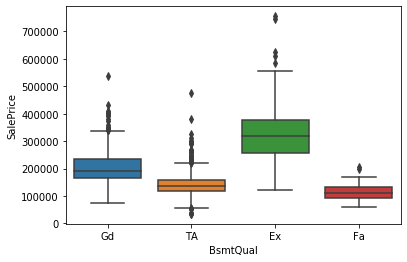

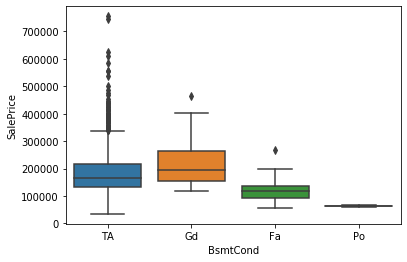

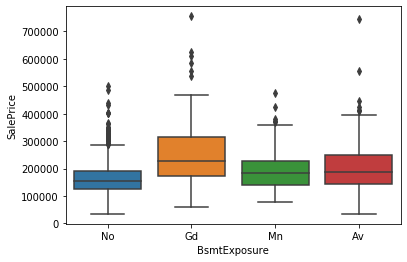

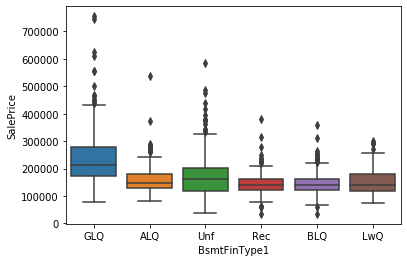

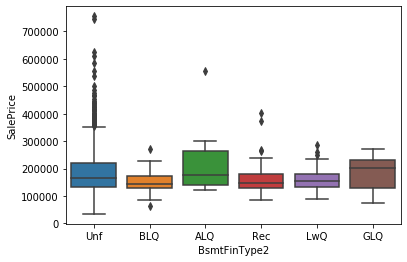

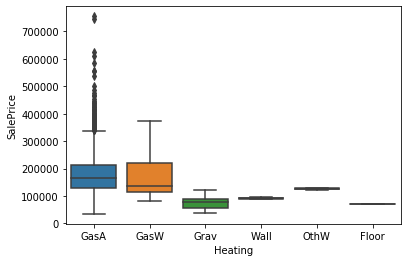

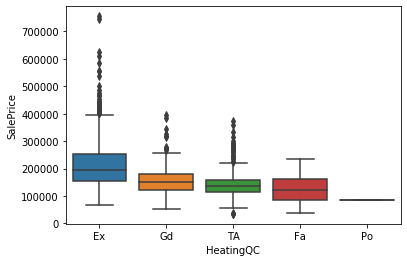

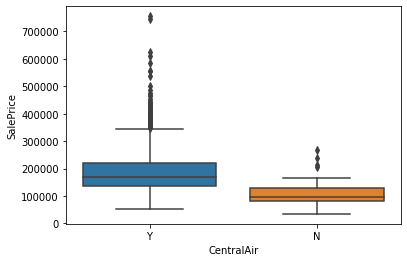

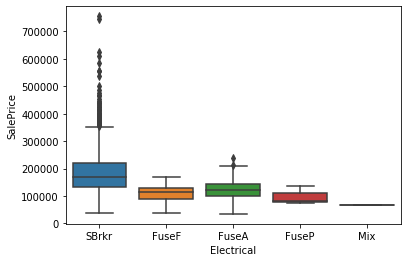

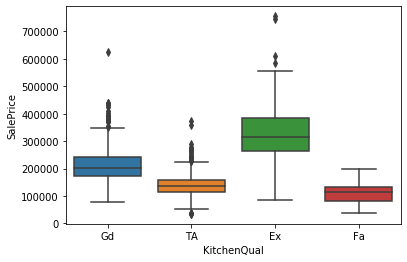

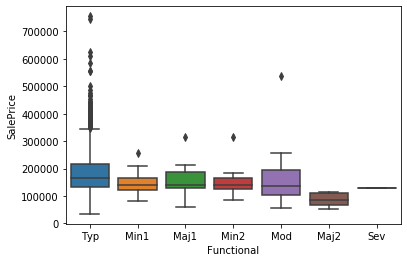

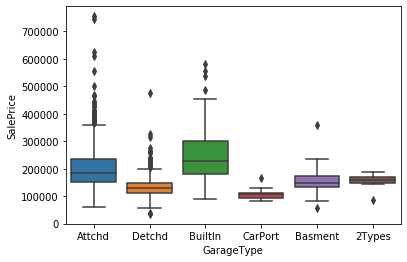

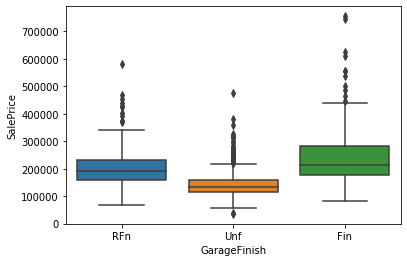

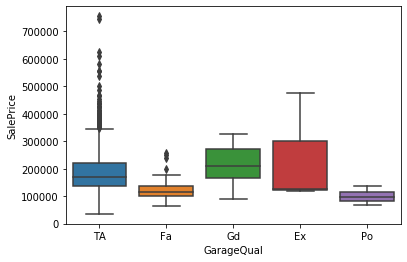

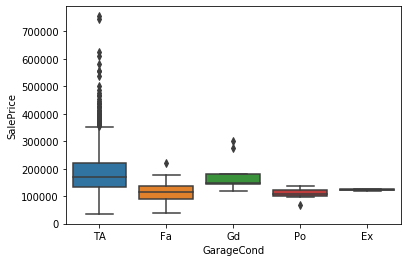

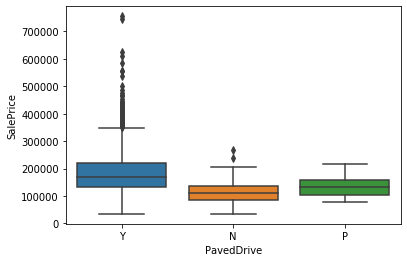

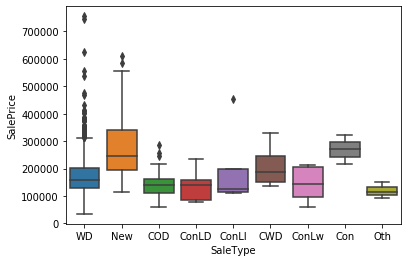

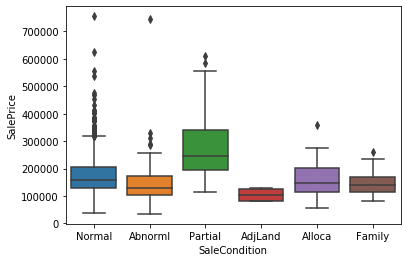

In [8]:
#relation btw categorical variables and target
plt.rcParams.update({'figure.max_open_warning': 0})# to ignore warning about memory (many plots)

for col in df.select_dtypes('object').columns:
    plt.figure()
    sns.boxplot(x=df[col],y=df['SalePrice'])

### Continuous variables  analysis

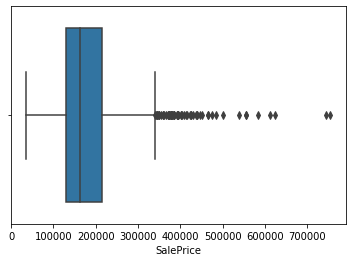

In [10]:
#target
sns.boxplot(df['SalePrice'])
# we can reduce the number of outliers

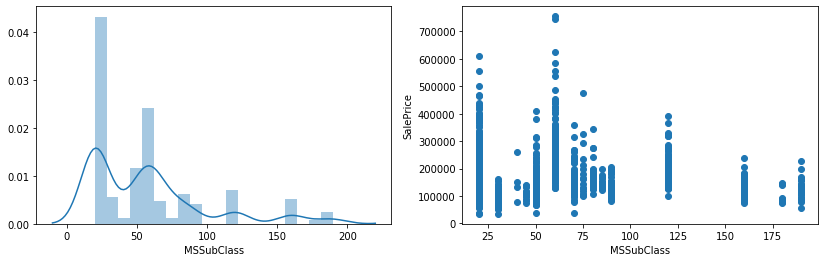

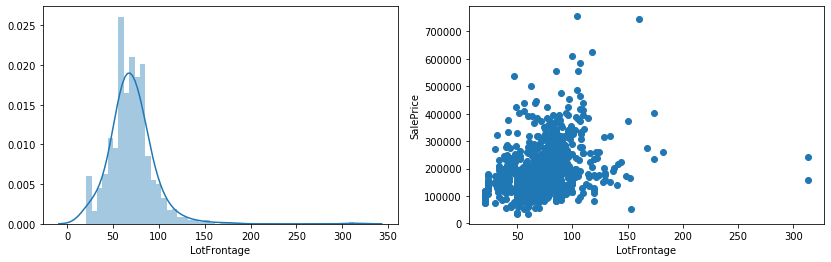

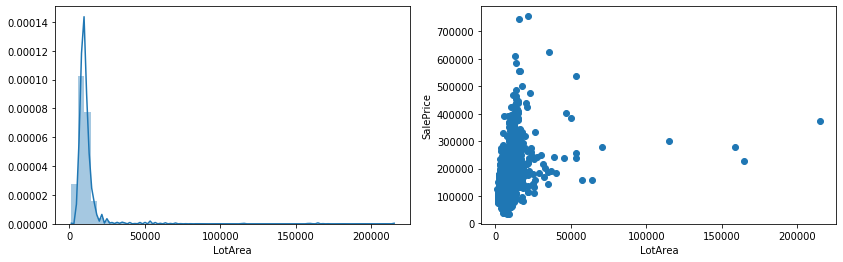

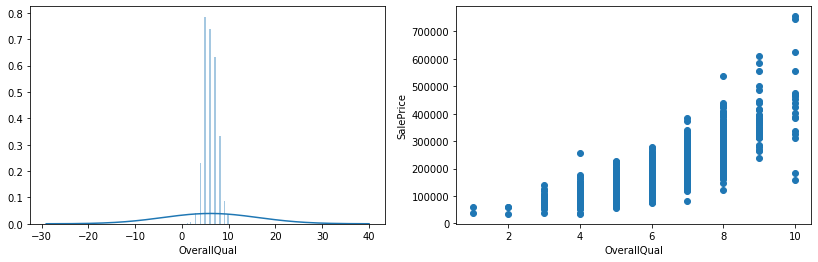

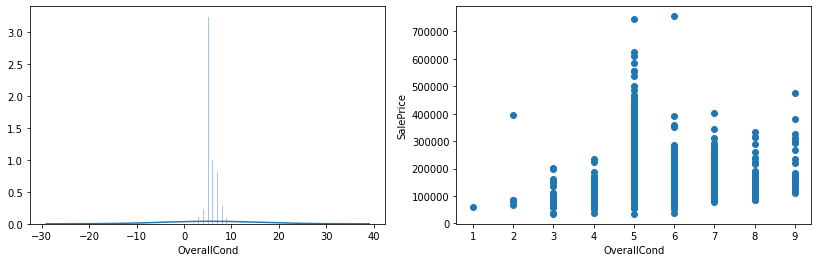

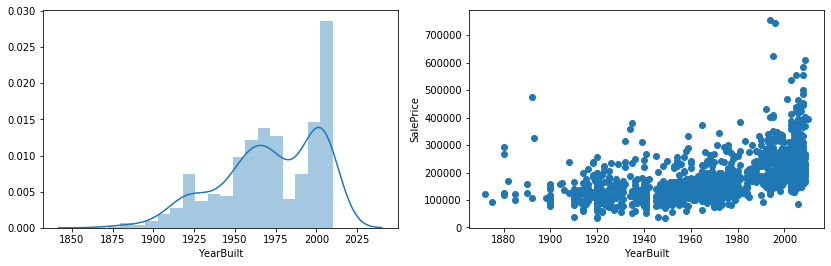

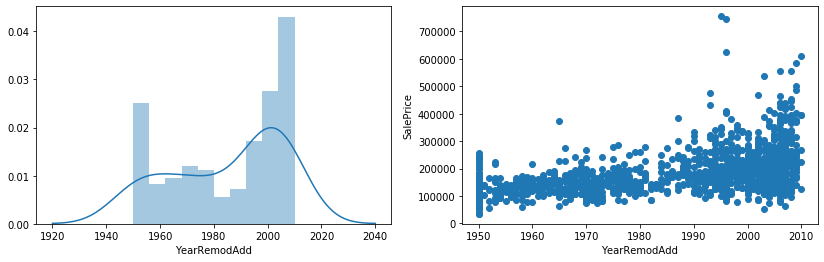

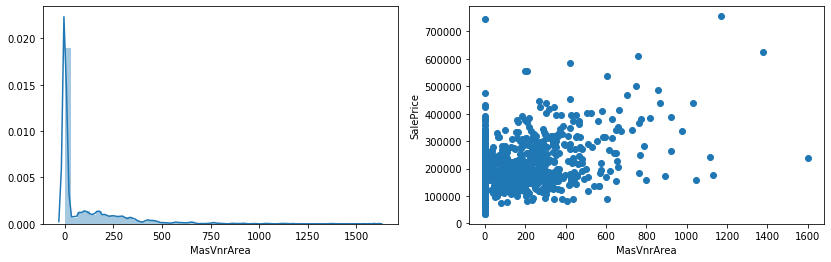

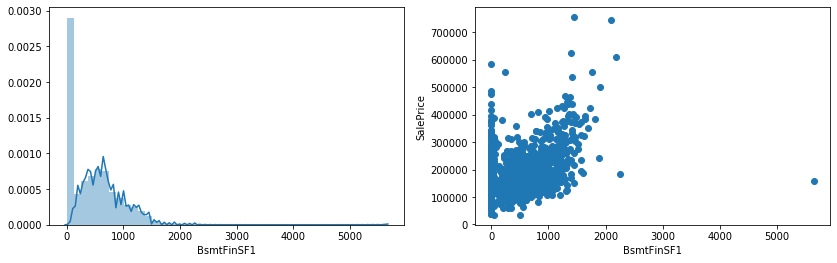

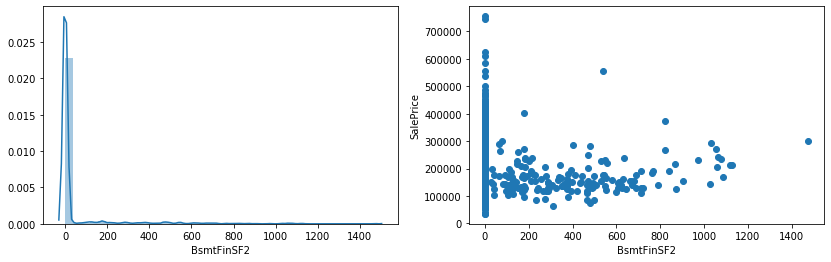

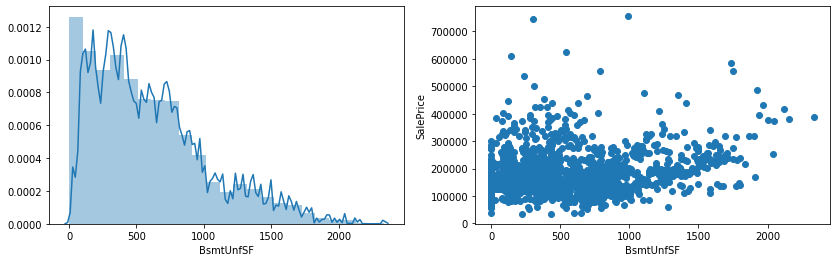

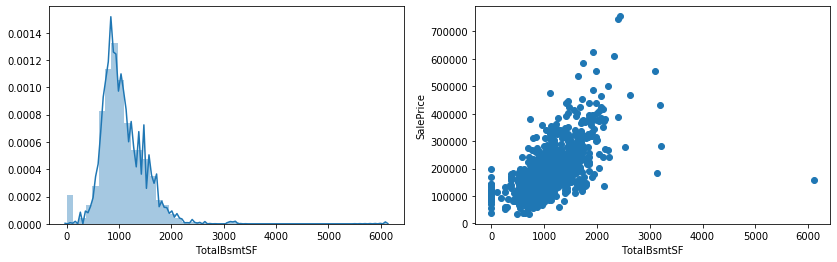

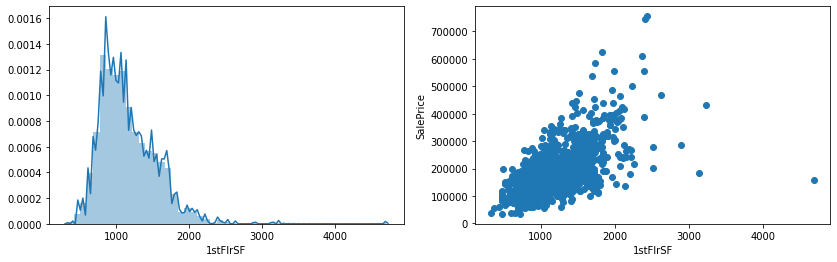

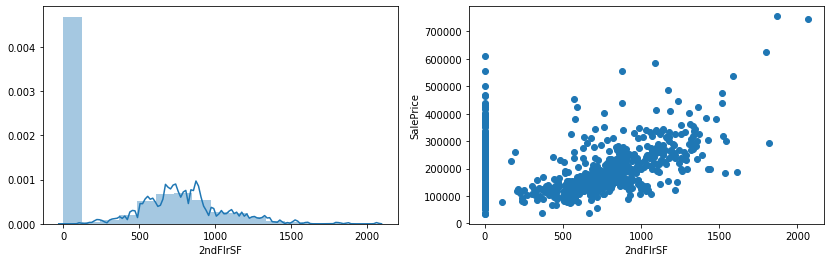

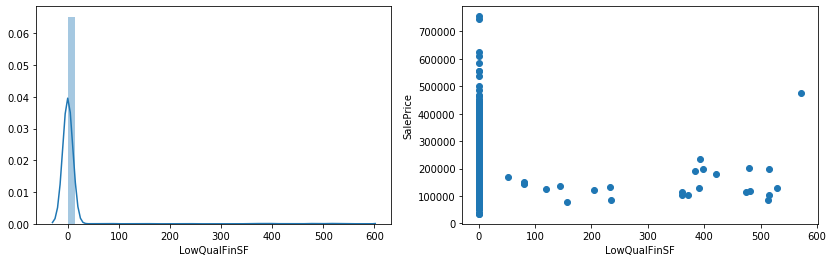

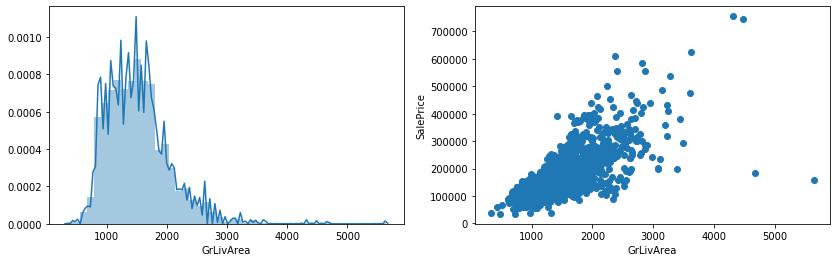

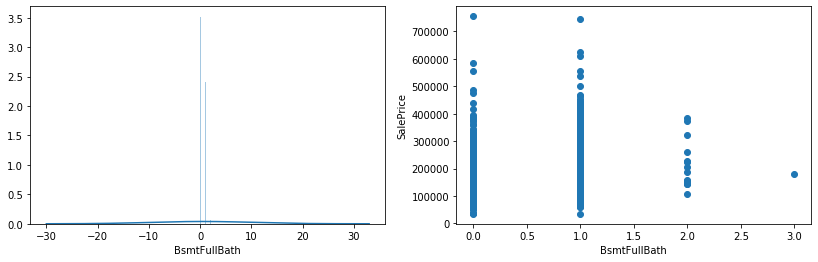

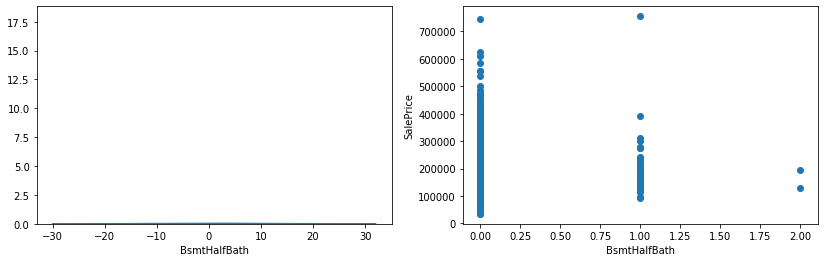

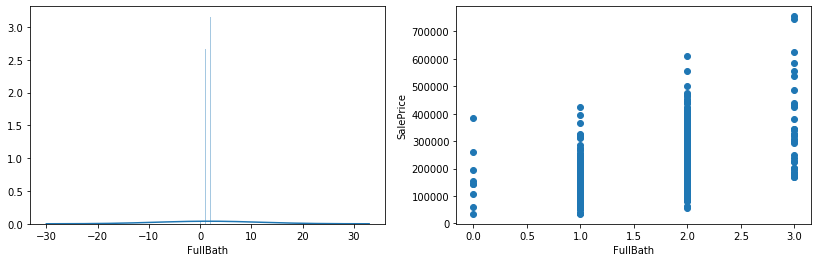

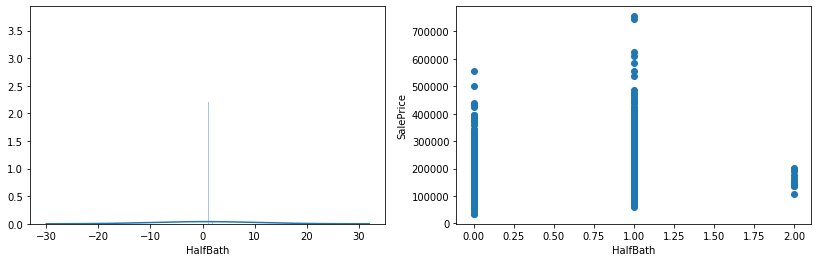

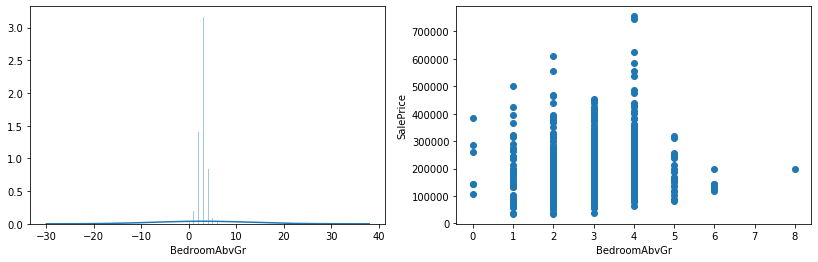

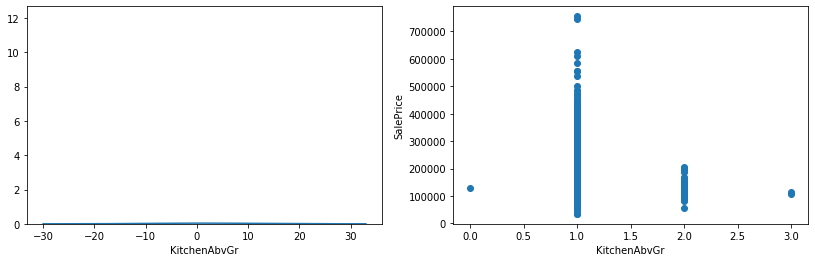

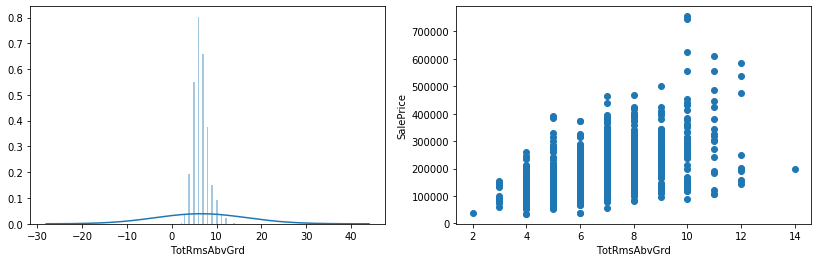

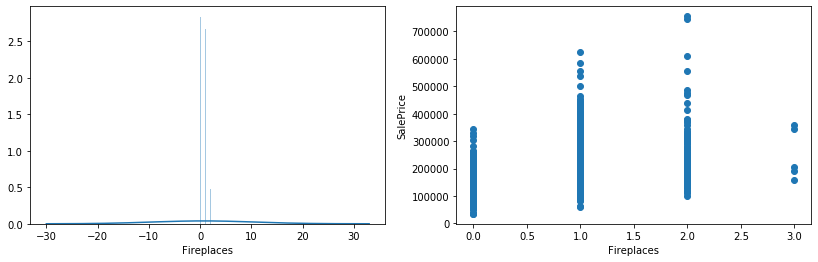

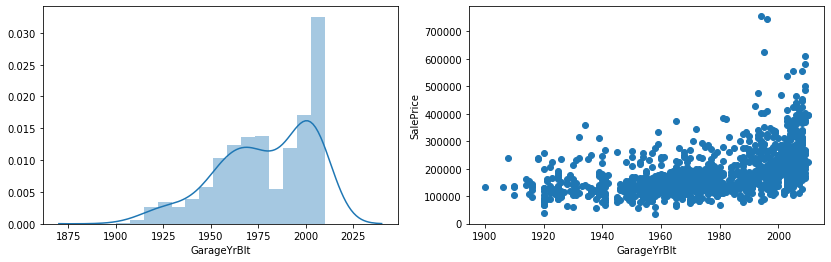

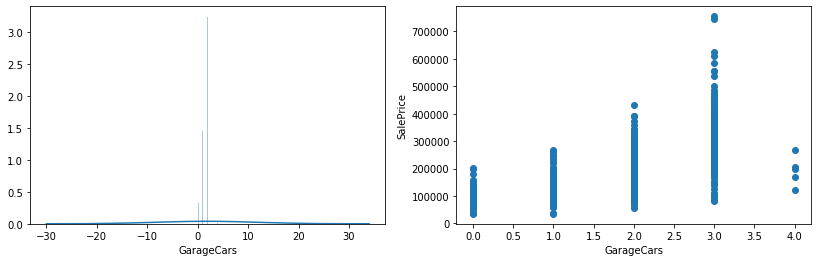

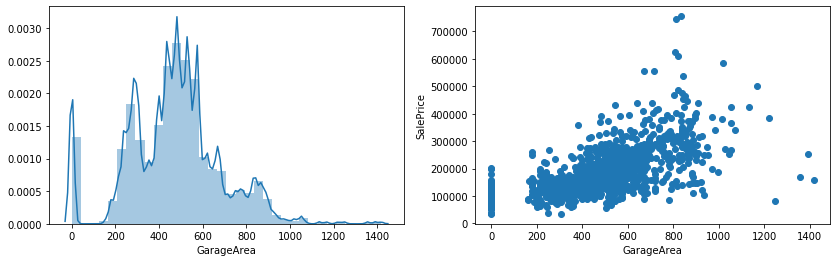

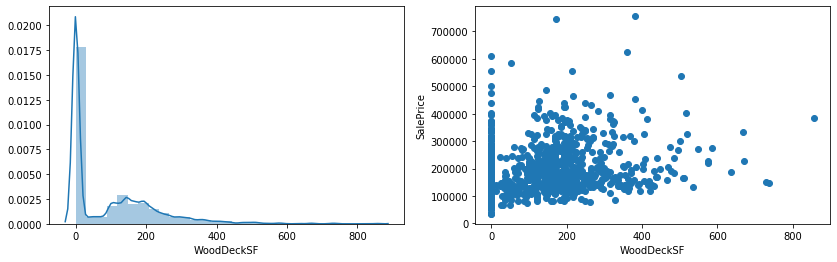

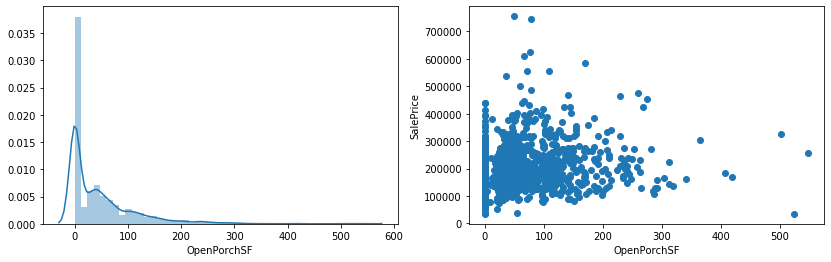

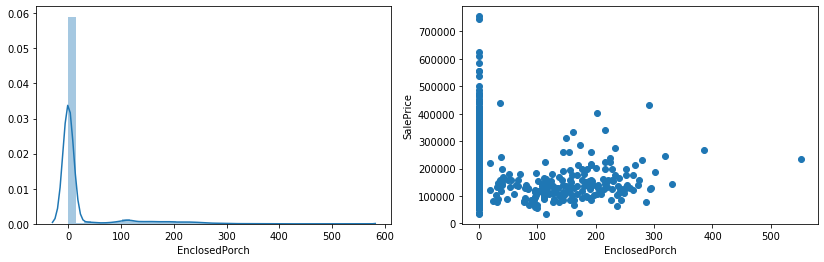

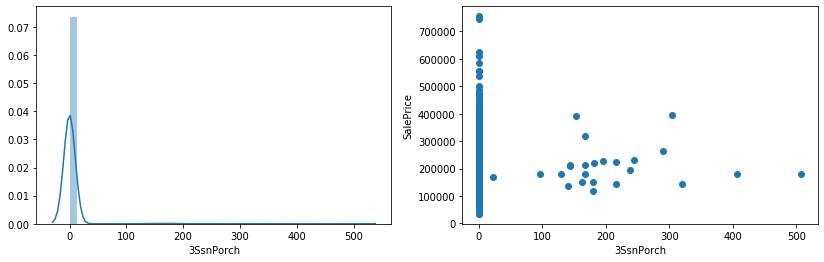

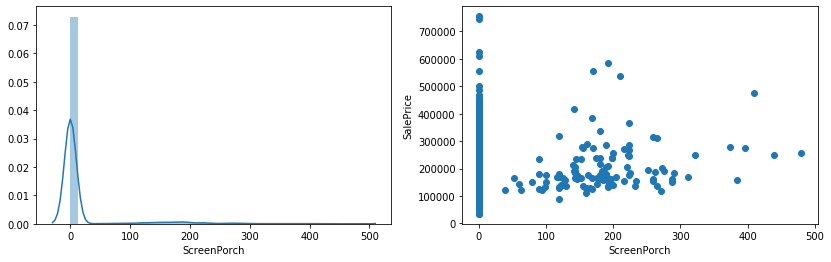

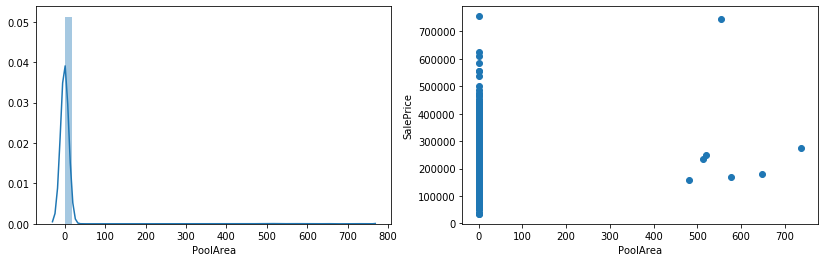

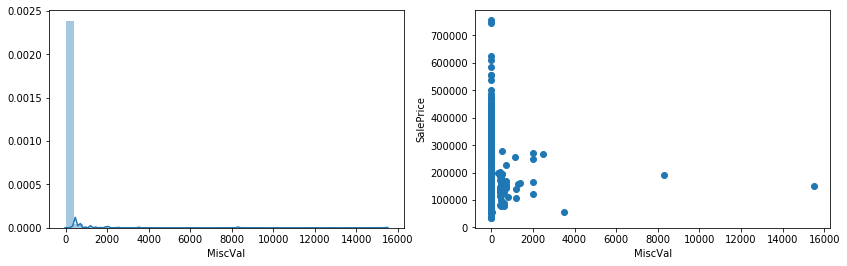

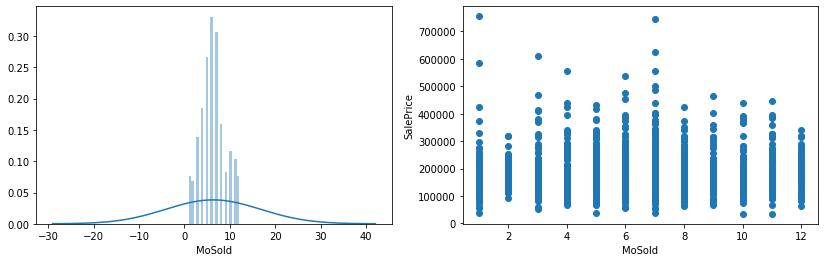

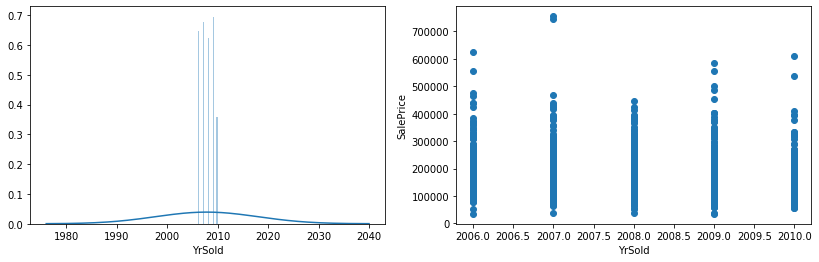

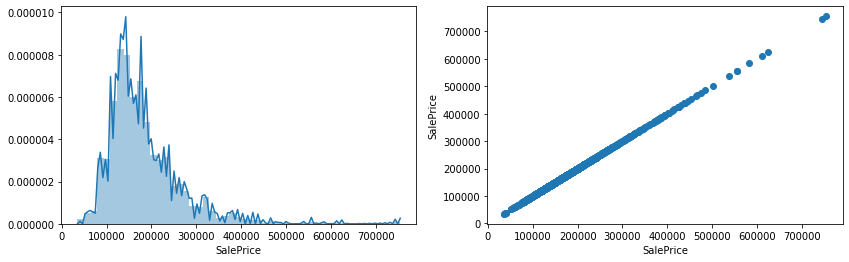

In [11]:
#Distribution of continuous variables and their relation to the target
for col in df.select_dtypes(('int64','float64')).columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col],hist=True,kde_kws={'bw':10})
    plt.subplot(122)
    plt.scatter(df[col],df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')

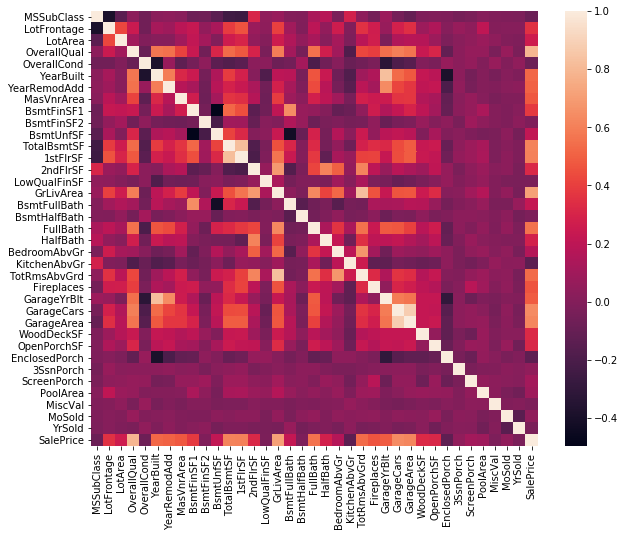

In [12]:
# Correlation between continuous variables
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(('int64','float64')).corr())

In [13]:
# Features with correlation  0.6< corr <1
A=((abs(df.select_dtypes('int64','float64').corr())>0.60) & (df.select_dtypes('int64','float64').corr()<1))
column2=0
for co in A.values:
    if np.where(co==True)[0].size >0 :
        
#np.where(condition,x,y) if x,y no precised => return condition.nonzero()=> the indices where condition is True.
        column1 = np.where(co==True)[0] 
        var1=df.select_dtypes('int64','float64').columns[column1]
        var2=df.select_dtypes('int64','float64').columns[column2]
        print (f' High correlations btw : {var1} and {var2}')        
    column2=column2+1
    #print (f' les colonnes ayant une forte correlation sont : {df.columns[column1]} et {df.columns[column2]}')


 High correlations btw : Index(['GarageCars', 'SalePrice'], dtype='object') and OverallQual
 High correlations btw : Index(['BsmtFullBath'], dtype='object') and BsmtFinSF1
 High correlations btw : Index(['1stFlrSF', 'SalePrice'], dtype='object') and TotalBsmtSF
 High correlations btw : Index(['TotalBsmtSF', 'SalePrice'], dtype='object') and 1stFlrSF
 High correlations btw : Index(['GrLivArea', 'HalfBath', 'TotRmsAbvGrd'], dtype='object') and 2ndFlrSF
 High correlations btw : Index(['2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'SalePrice'], dtype='object') and GrLivArea
 High correlations btw : Index(['BsmtFinSF1'], dtype='object') and BsmtFullBath
 High correlations btw : Index(['GrLivArea'], dtype='object') and FullBath
 High correlations btw : Index(['2ndFlrSF'], dtype='object') and HalfBath
 High correlations btw : Index(['TotRmsAbvGrd'], dtype='object') and BedroomAbvGr
 High correlations btw : Index(['2ndFlrSF', 'GrLivArea', 'BedroomAbvGr'], dtype='object') and TotRmsAbvGrd
 High corre

# Preprocessing:
    Train set/Test set creation
    Elimination of Na
    Encoding
    Elimination of outliers
    Features Selection
    Feature Engineering
    Feature Scaling 

###  Data preparation

In [61]:
data=pd.read_csv('train.csv')
df=data.copy()
#remove features having lot of missing data (more than 40% ) => are removed : PoolQC, MiscFeature, Alley, Fence,FireplaceQu
df=df[df.columns[df.isna().sum()/df.shape[0]<0.4]]

#remove the feature ID
df=df.drop('Id',axis=1)

X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']
#remouve outliers from the  target
def remove_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.3*iqr
    fence_high = q3+1.3*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

df=remove_outlier(df,'SalePrice')
df.shape

(1379, 75)

### spliting Data

In [62]:
#y_train.values.reshape(-1,1).shape
#y_test.shape

#Création du Train set/Test set 
#selection des variables et de la target
y=df['SalePrice']
X=df.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)
y_train.shape

(1103,)

In [63]:
X_test_transformed

<268x264 sparse matrix of type '<class 'numpy.float64'>'
	with 19826 stored elements in Compressed Sparse Row format>

In [76]:
numerical_Features = make_column_selector(dtype_include=np.number)
categorical_Features = make_column_selector(dtype_exclude=np.number)

numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline= make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))

transformer=make_column_transformer((numerical_pipeline, numerical_Features), (categorical_pipeline,categorical_Features))

# X train and test transformation 'fitting on X_train to aviod leakage'
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed=transformer.transform(X_test)



# Y train and test transformation 'fitting on Y_train
Transformer_Y=StandardScaler().fit(y_train.values.reshape(-1,1))
y_train_transformed=Transformer_Y.transform(y_train.values.reshape(-1,1))
y_test_transformed=Transformer_Y.transform(y_test.values.reshape(-1,1))

y_train_transformed=y_train_transformed.reshape(-1,)
y_test_transformed=y_test_transformed.reshape(-1,)

random_state=0
classifiers = [
              LinearRegression(),
              KNeighborsRegressor(),
              SVR(),
              DecisionTreeRegressor(random_state=random_state),
              RandomForestRegressor(random_state=random_state),
              AdaBoostRegressor(random_state=random_state),
              GradientBoostingRegressor(random_state=random_state),
              MLPRegressor(random_state=random_state),
              SGDRegressor(random_state = random_state)
              
              ]
res_columns=['clf name','RMSE','RMSE_test_data','r2_score']
df_result = pd.DataFrame(columns = res_columns)
cv=KFold(5)
idx_raws=0
for cl in classifiers: 
    cl.fit(X_train_transformed,y_train_transformed)

    df_result.loc[idx_raws, 'clf name']= cl.__class__.__name__
    df_result.loc[idx_raws,'RMSE' ]=cross_validate(cl,X_train_transformed, y_train_transformed,cv=cv, scoring=('neg_root_mean_squared_error'))['test_score'].mean()
    df_result.loc[idx_raws,'r2_score']=cross_validate(cl,X_train_transformed, y_train_transformed,cv=cv, scoring=('r2'))['test_score'].mean()
    df_result.loc[idx_raws,'RMSE_test_data']=np.sqrt(mean_squared_error(y_test_transformed,cl.predict(X_test_transformed)))
    # cross validate : return a dic we are looking for scores on test_score 
    #we can use also => cross_val_score(cl,X_train_transformed, y_train_transformed,cv=cv, scoring=('neg_root_mean_squared_error')).mean()
    idx_raws=idx_raws+1
    df_result.sort_values(by='RMSE_test_data',ascending=True,inplace=True)
df_result

,clf name,RMSE,RMSE_test_data,r2_score
6,GradientBoostingRegressor,-0.359607,0.308056,0.868994
0,LinearRegression,-0.504044,0.326552,0.719437
2,SVR,-0.336316,0.329855,0.885025
7,MLPRegressor,-0.390932,0.350273,0.841265
8,SGDRegressor,-0.478408,0.350391,0.760195
4,RandomForestRegressor,-0.394128,0.360902,0.843021
5,AdaBoostRegressor,-0.449072,0.420272,0.797198
1,KNeighborsRegressor,-0.452408,0.422256,0.793935
3,DecisionTreeRegressor,-0.552538,0.537482,0.692653


In [39]:
#from xgboost import XGBRegressor
#erxgb= cross_validate(XGBRegressor(),Xtrain_transformed, ytransformed,cv=cv, scoring=('neg_root_mean_squared_error'))['test_score'].mean()
#erxgb

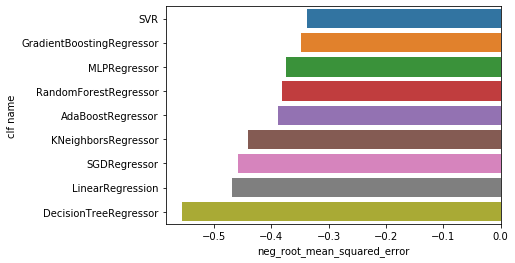

In [40]:
sns.barplot(x=df_result['neg_root_mean_squared_error'],y=df_result['clf name'],data=df_result)

In [ ]:
# modèles à optimiser : 
# Gradient Boosting : les courbes train val converge mais avec un peu d'Overfitting
# Random forest : bon score mais trop d'overfitting 
# SVR : un peu d'overfitting
# SGDRegressor : plutot underfitting ==> score du train qui diminue et qui s'approche su score val

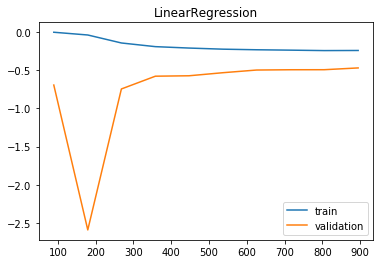

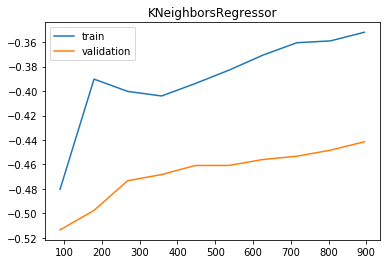

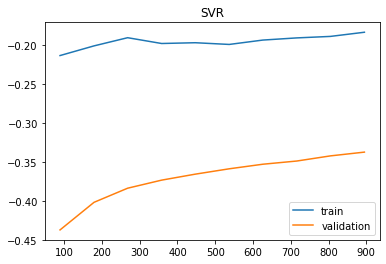

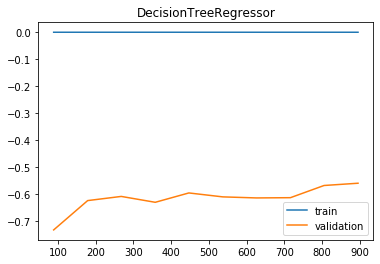

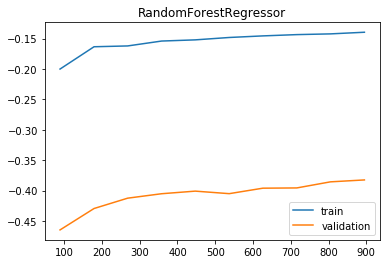

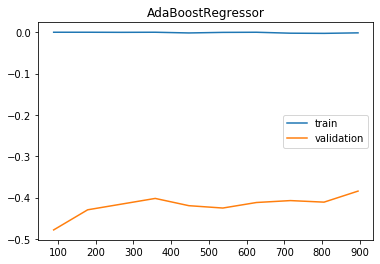

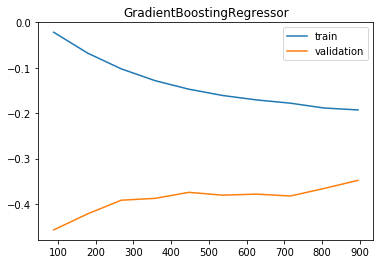

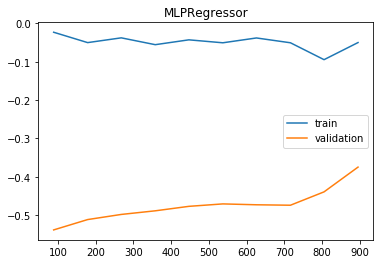

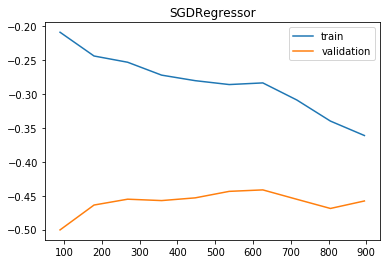

In [42]:
#Learning curve 
for cl in classifiers:
    N,train_score, val_score=learning_curve(cl, X_train_transformed, y_train_transformed,train_sizes=np.linspace(0.1,1,10),scoring='neg_root_mean_squared_error',cv=cv)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='validation')
    plt.legend()
    plt.title(cl.__class__.__name__)

In [65]:
#GridSearch SGDRegressor
param_grid={'penalty': ['l1','l2'],'alpha':[0.0001,0.001,0.01,0.1,1,10]}
GridSGD=GridSearchCV(SGDRegressor(), param_grid,cv=cv,scoring='neg_root_mean_squared_error')
GridSGD.fit(X_train_transformed, y_train_transformed)
SGDBest=GridSGD.best_estimator_
print ('Param of the best model LR {}'.format(GridSGD.best_params_))
print ('RMSE for the model with the best param : {:.2f}'.format(GridSGD.best_score_))
print('RMSE calculated on test data : {:2f}'.format(np.sqrt(mean_squared_error(y_test_transformed,SGDBest.predict(X_test_transformed)))))

Param of the best model LR {'alpha': 0.1, 'penalty': 'l2'}
RMSE for the model with the best param : -0.46
RMSE calculated on test data : 0.366962


In [68]:
#GridSearch MLPRegressor
param_grid={'hidden_layer_sizes': [2,500],
            'learning_rate_init': [0.001,0.01],
            'activation':['logistic','tanh'],
            'learning_rate':['constant','adaptive'] 
           }
GridMLPR=GridSearchCV(MLPRegressor(max_iter=2000,random_state=random_state), param_grid,cv=cv,scoring='neg_root_mean_squared_error')
GridMLPR.fit(X_train_transformed, y_train_transformed)

MLPRBest=GridMLPR.best_estimator_
print ('Param of the best model MLP {}'.format(GridMLPR.best_params_))
print ('RMSE for the model with the best param : {:.2f}'.format(GridMLPR.best_score_))
print('RMSE calculated on test data : {:2f}'.format(np.sqrt(mean_squared_error(y_test_transformed,MLPRBest.predict(X_test_transformed)))))

Param of the best model MLP {'activation': 'tanh', 'hidden_layer_sizes': 2, 'learning_rate': 'constant', 'learning_rate_init': 0.001}
RMSE for the model with the best param : -0.35
RMSE calculated on test data : 0.335247


In [100]:
#GridSearch GradientBoostingRegressor => parameters proposed by Grid search are not really the best one for higher result on data_test=> default parameter are best
param_grid={'n_estimators': [50,100,150,300],
            'learning_rate': [0.001,0.01,0.1,1],
            'max_features':[0.2,0.4,0.6,0.8,1] #features to consider when looking for the best split => Choosing max_features < n_features leads to a reduction of variance and an increase in bias.
           }
GridGBR=GridSearchCV(GradientBoostingRegressor(random_state=random_state), param_grid,cv=cv,scoring='neg_root_mean_squared_error')
GridGBR.fit(X_train_transformed, y_train_transformed)
GBRBest=GridGBR.best_estimator_
print ('Param of the best model GBRegressor {}'.format(GridGBR.best_params_))
print ('RMSE for the model with the best param : : {:.2f}'.format(GridGBR.best_score_))
print('RMSE score calculated on test data : {:2f}'.format(np.sqrt(mean_squared_error(y_test_transformed,SGDBest.predict(X_test_transformed)))))

Param of the best model GBRegressor {'learning_rate': 0.1, 'max_features': 0.2, 'n_estimators': 300}
RMSE for the model with the best param : : -0.33
RMSE score calculated on test data : 0.366962


In [119]:
#GridSearch for RandomForestRegressor()
param_grid={'n_estimators': [50,100,150,300],
            'max_features':[0.2,0.4,0.6,0.8,1] #features to consider when looking for the best split => Choosing max_features < n_features leads to a reduction of variance and an increase in bias.
           }
GridRFR=GridSearchCV(RandomForestRegressor(random_state=random_state), param_grid,cv=cv,scoring='neg_root_mean_squared_error')
GridRFR.fit(X_train_transformed, y_train_transformed)
RFRBest=GridRFR.best_estimator_
print ('Param of the best model RandomForestRegressor {}'.format(GridRFR.best_params_))
print ('RMSE for the model with the best param : : {:.2f}'.format(GridRFR.best_score_))
print('RMSE score calculated on test data : {:2f}'.format(np.sqrt(mean_squared_error(y_test_transformed,GridRFR.predict(X_test_transformed)))))

Param of the best model RandomForestRegressor {'max_features': 0.4, 'n_estimators': 300}
RMSE for the model with the best param : : -0.37
RMSE score calculated on test data : 0.338805


## Best Result 

In [118]:
#Can be improved by doing some feature engineering 
reg=GradientBoostingRegressor()
reg.fit(X_train_transformed, y_train_transformed)
np.sqrt(mean_squared_error(y_test_transformed,regB.predict(X_test_transformed)))
print(f'The best model with lower RMSE  on test data is : \n{reg}')
print(f'The RMSE score with this  model on test data is : {np.sqrt(mean_squared_error(y_test_transformed,reg.predict(X_test_transformed))).round(3)}')

The best model with lower RMSE  on test data is : 
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
The RMSE score with this  model on test data is : 0.306
